# Tutorial

Go through few examples.

First, import the following dependencies that we will be work with. 

In [38]:
import numpy as np
from scipy.signal import ricker
from sweep_design import (ArrayAxis, Relation, Signal, UncalculatedSweep, 
                            ApriorUncalculatedSweep, Spectrum)
from sweep_design.utility_functions import tukey_a_t
import matplotlib.pyplot as plt 

## Contents:
1. Introduction
2. ArrayAxis
3. Relation
4. Signal
5. Sweep
6. Spectrum
7. UncalculatedSweep
8. ApriorUncalculatedSweep
9. Configuration.

## 1. Introduction

The project was created for a simple design of sweep signal. Easy and fast way 
to create sweep signal. But to create a new one, we have developed a some new 
entities that help in creating of sweep signal. 

Below representation structure of this objects in a project.  
![schema](diagrams/out/diagram_short/short_structure_sweep-design.png)  
Following this diagram, we describe how to work with the library sweep-design.

## 2. ArrayAxis

Let's create time axis. Start time is 0. end time is 10. sample of array 0.001

In [2]:
time = ArrayAxis(start=0., end=10., sample=0.001)

`ArrayAxis` has properties: `size`, `actual_sample`, `start`, `end` and `sample` 

In [3]:
print(time.start)
print(time.end)
print(time.sample)
print(time.size)
print(time.actual_sample)

0.0
10.0
0.001
10001
0.0009999999999994458


Easy way to show information is print axis.

In [4]:
print(time)

start: 0.0
end: 10.0
sample: 0.001
size: 10001
calculated sample: 0.0009999999999994458


Calculated sample (time.actual_sample) - is sample taken from np.ndarray. Find 
common occurrence difference between neighbor of elements. The problem with 
floating numbers.

## 3. Relation
A relation instance is a representation of some mathematical functions, such as
y = f(x).

Look at building simple function of sin with frequency 1 Hz.

In [5]:
amplitude = np.sin(2*np.pi*time.array)
sin_1 = Relation(time, amplitude)

sin_1- instance of class `Relation` represent dependencies between time and 
amplitude such as mathematical function 

$$ amplitude = sin(2\cdot\pi\cdot time) $$

Relation instance have same properties as ArrayAxis.
Also have other properties: `x`, `y`.

We can use `matplotlib` to show result in next section. 

Text(0.5, 1.0, 'Sin 1Hz')

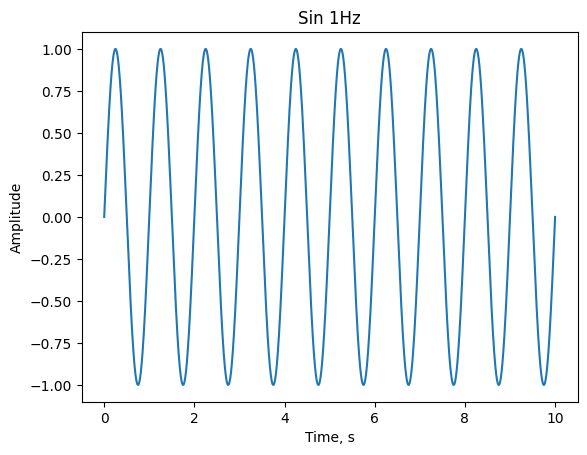

In [6]:
r_time, r_amplitude = sin_1.get_data()
plt.plot(r_time, r_amplitude)
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Sin 1Hz')

Also you can find maximum and minimum of relation

In [7]:
print(sin_1.max())
print(sin_1.min())

1.0
-1.0


Norm of function.

In [8]:
sin_1.get_norm()

5000.0

Interpolate of function expected by instance of Relation using new array axis

In [9]:
time_new = ArrayAxis(0.,10., 0.0005)
interpolate_sin_1 = sin_1.interpolate_extrapolate(time_new)

Shift relation, equal y=f(x+c) where c - is shift constant.

In [10]:
shifted_sin_1 = sin_1.shift(2)

Also you can select interesting segment of data using to methods, 
select_data method or use square brackets.

Text(0.5, 1.0, 'Sin 1Hz')

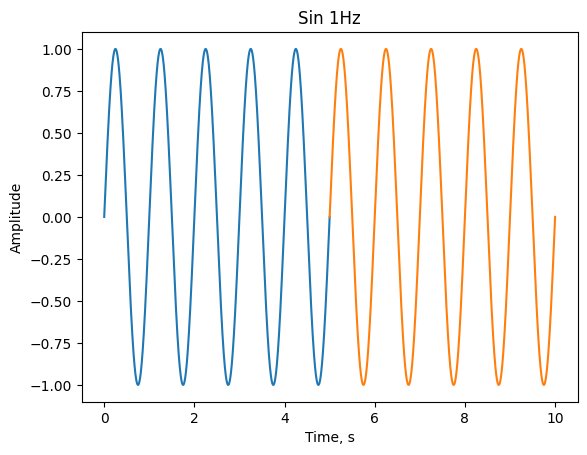

In [11]:
r_time, r_amplitude = sin_1.get_data()
plt.plot(*sin_1.select_data(0., 5.).get_data())
plt.plot(*sin_1[5.:10.].get_data())
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Sin 1Hz')


cumulative integration and differentiation of function

Text(0.5, 1.0, 'Functions')

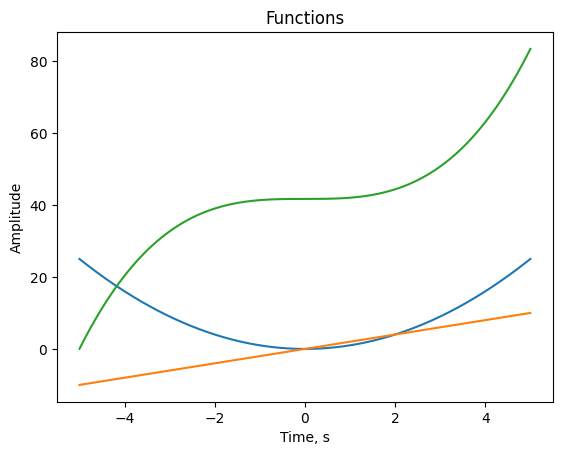

In [12]:
time_5 = ArrayAxis(-5., 5., 0.001)
y2 = Relation(time_5, time_5.array**2)
diff_y2 = y2.diff()
integration_y2 = y2.integrate()

plt.plot(*y2.get_data())
plt.plot(*diff_y2.get_data())
plt.plot(*integration_y2.get_data())
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Functions')

exponent of function. 
$$ y = f(x) $$ 
$$ r = e^y $$
equal:


In [13]:
r = sin_1.exp()

With instance of class `Relation` we can use different mathematical operations 
(+, -, *, /, **, +=, -=, /=, *=). 
Operation can be with other instance of class `Relation` or numbers.
Next examples with number. Subtraction constant from sin_1.

Text(0.5, 1.0, 'Sin 1Hz')

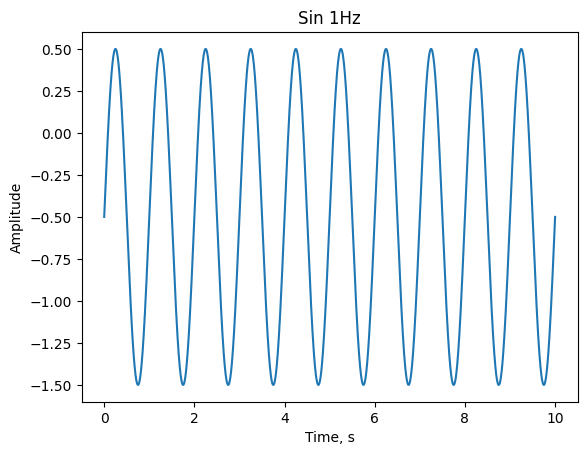

In [14]:
sub_sin_1 = sin_1-0.5
plt.plot(*sub_sin_1.get_data())
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Sin 1Hz')


To demonstrate operation with other `Relation` instance, let's create other sin 
function with 20Hz. And summing two instances sin_1 and sin_20.

Text(0.5, 1.0, 'Sin 1Hz + Sin 20Hz')

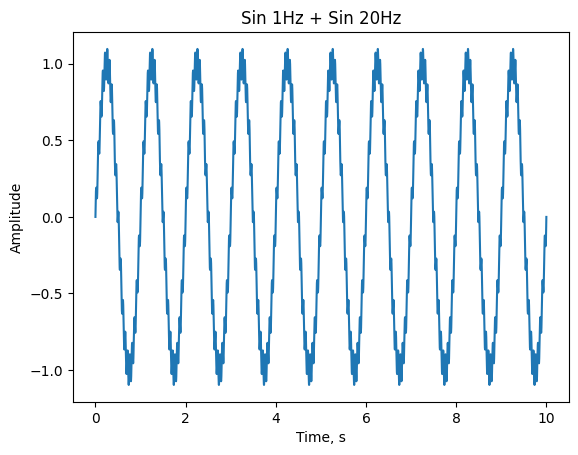

In [15]:
sin_20 = Relation(time, 0.1*np.sin(time.array*2*np.pi*20))
sum_sin1_sin20 = sin_1 + sin_20

r_time_1_20, r_amplitude_1_20 = sum_sin1_sin20.get_data()
plt.plot(r_time_1_20, r_amplitude_1_20)
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Sin 1Hz + Sin 20Hz')

It's better if you use a Relation instance with an equal axis array, but 
sometimes you can't use. Then, when calculating math operation, new array axis 
found small sample and big boundaries. And y component of each relation 
interpolate with new common axis and extrapolate by zeros. After that, execute 
mathematical operation and return the result.  

Text(0.5, 1.0, 'New Sin 1Hz + Sin 20Hz')

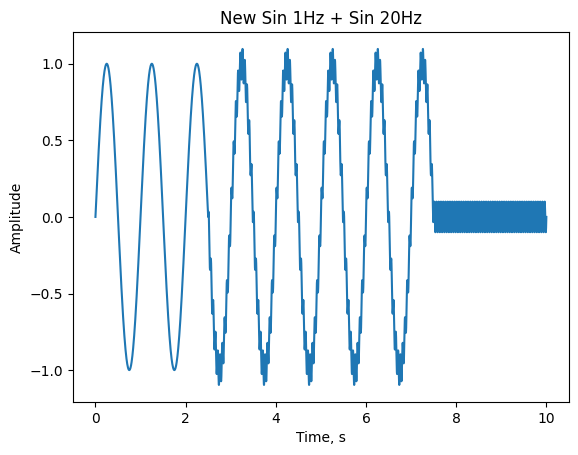

In [16]:
time1 = ArrayAxis(0., 7.5, 0.005)
time2 = ArrayAxis(2.5, 10., 0.001)

new_sin_1 = Relation(time1, np.sin(time1.array*2*np.pi))
new_sin_20 = Relation(time2, 0.1*np.sin(time2.array*2*np.pi*20))

new_sum_sin1_sin20 = new_sin_1 + new_sin_20

plt.plot(*new_sum_sin1_sin20.get_data())
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('New Sin 1Hz + Sin 20Hz')

To find two common axis for relations use class method `equalize`. This method 
use for math operations, convolution and correlations.

In [17]:
common_new_sin_1, common_new_sin_20 = Relation.equalize(new_sin_1, new_sin_20)

Available class methods to `correlate` and `convolve`.
Look on convolution triangle and rectangle.

Text(0.5, 1.0, 'Result Convolution')

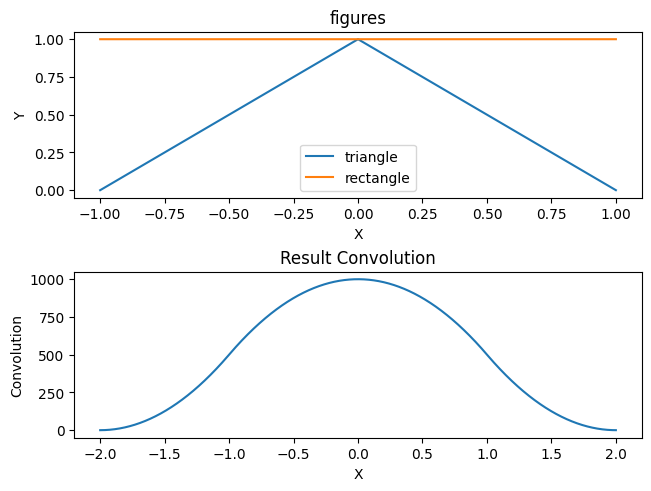

In [40]:
x = ArrayAxis(-1., 1., 0.001)

triangle = Relation(x, -1*(np.abs(x.array)-1))
rectangle = Relation(x, np.ones(x.size))

convolution = Relation.convolve(triangle, rectangle)

figure, axis = plt.subplots(2, 1, constrained_layout=True)

axis[0].plot(*triangle.get_data(), label='triangle')
axis[0].plot(*rectangle.get_data(), label='rectangle')
axis[0].set_title("figures")
axis[0].set_xlabel("X")
axis[0].set_ylabel("Y")
axis[0].legend()


axis[1].plot(*convolution.get_data())
axis[1].set_xlabel('X')
axis[1].set_ylabel('Convolution')
axis[1].set_title('Result Convolution')


## 4. Signal

The class `Signal` inherited from the class `Relation`.
It has the same operation as Relation class. Additional has operation to
convert signal to spectrum. 

List additional methods:

In [19]:
signal_sin_1 = Signal(sin_1)
signal_sin_1.get_spectrum()
signal_sin_1.get_amplitude_spectrum()
signal_sin_1.get_phase_spectrum()
signal_sin_1.get_reverse_signal()
signal_sin_1.add_phase(signal_sin_1)
signal_sin_1.sub_phase(signal_sin_1)

and has properties:
time and amplitude

In [20]:
print(signal_sin_1.time)
print(signal_sin_1.amplitude)

start: 0.0
end: 10.0
sample: 0.001
size: 10001
calculated sample: 0.0009999999999994458
[ 0.00000000e+00  6.28314397e-03  1.25660399e-02 ... -1.25660399e-02
 -6.28314397e-03 -2.44929360e-15]


Let's check that the sum of sin 1 Hz and 20 Hz has an amplitude spectrum of 1 Hz 
and 20 Hz.

Text(0.5, 1.0, 'Amplitude spectrum Sin 1Hz + Sin 20Hz')

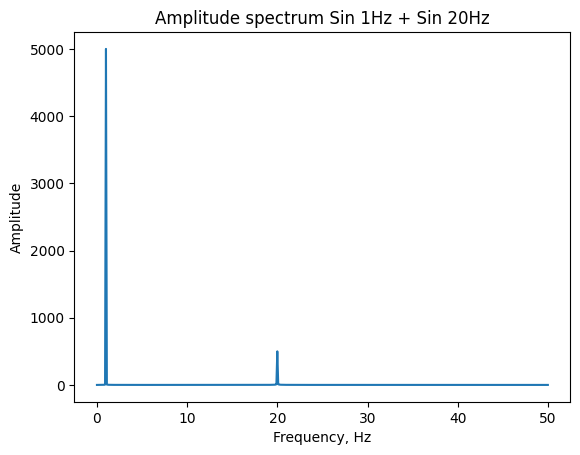

In [21]:
signal_sum_sin1_sin20 = Signal(sum_sin1_sin20)
plt.plot(*signal_sum_sin1_sin20.get_amplitude_spectrum()[0:50].get_data())
plt.xlabel('Frequency, Hz')
plt.ylabel('Amplitude')
plt.title('Amplitude spectrum Sin 1Hz + Sin 20Hz')


Where an operation with signal is expected, the spectrum instance will be converted 
to signal instance and operation will be with them.

## 5. Spectrum

The `Spectrum` class inherited from `Relation` class.
It has the same operation as Relation class. Additional has operation to
convert spectrum to signal. 

List additional methods: 

In [22]:
spectrum_sum_sin1_sin20 = signal_sum_sin1_sin20.get_spectrum()
spectrum_sum_sin1_sin20.get_amp_spectrum()
spectrum_sum_sin1_sin20.get_phase_spectrum()
spectrum_sum_sin1_sin20.get_reverse_filter()
spectrum_sum_sin1_sin20.add_phase(spectrum_sum_sin1_sin20)
spectrum_sum_sin1_sin20.sub_phase(spectrum_sum_sin1_sin20)

Class method `get_spectrum_from_amp_phase`

In [23]:
amplitude_spectrum = spectrum_sum_sin1_sin20.get_amp_spectrum()
phase_spectrum = spectrum_sum_sin1_sin20.get_phase_spectrum()

spectrum = Spectrum.get_spectrum_from_amp_phase(amplitude_spectrum, phase_spectrum)

Where an operation with spectrum is expected, the signal instance will be converted 
to spectrum instance and operation will be with them.

## 6. Sweep

The `Sweep` class represent of sweep function. `Sweep` inherited from  the `Signal` class.
And the `Sweep` class has the same methods as `Signal` class. 

Also `Sweep` instance has next properties:
- frequency_time - frequency modulation
- amplitude_time - amplitude modulation
- spectrogram - spectrogram of sweep signal. Expected by class `Spectrogram`
- a_prior_signal - the signal from which the sweep signal created, or None. 

If create sweep instance directly from some signal, then frequency_time and amplitude_time functions
will be calculated using hilbert transformation from `scipy`. 

How properties look in the following sections.

## 7. UncalculatedSweep

`UncalculatedSweep` is class to create `Sweep` instance.

The construction of a sweep signal is carried out according to the formula:

$$ S(t) = A(t)sin(\theta(t)+\theta_0) $$

where $t$ is the time that varies within $[0, T]$ $A(t)$ is the sweep amplitude 
change function, $\theta(t)$ is the angular sweep, $\theta_0$ is the initial phase

$$ \theta(t) = 2\pi\int\limits_{0}^{t}F(\tau)d\tau $$

where $F(t)$ - frequency versus time


UncalculatedSweep take three parameters:
- time, 
- amplitude_time function or amplitude modulation,
- frequency_time function or frequency modulation,

Analytic functions (`frequency_time` and `amplitude_time`) can be as array
of numbers or as callable object(lambda function, common python functions and ect.)
Example: frequency_time = lambda t: t*10+1, amplitude_time = lambda t: np.ones(t.size)

time is ArrayAxis, or np.ndarray (array of numbers), or None

To get instance of `Sweep`, we should call instance of `UncalculatedSweep` with 
a new or same time axis or with None. If we call with None, function tries to 
use time when we created instance `UncalculatedSweep`. If time was is not found 
then an exception will raised.

Text(0.5, 1.0, 'Linear sweep')

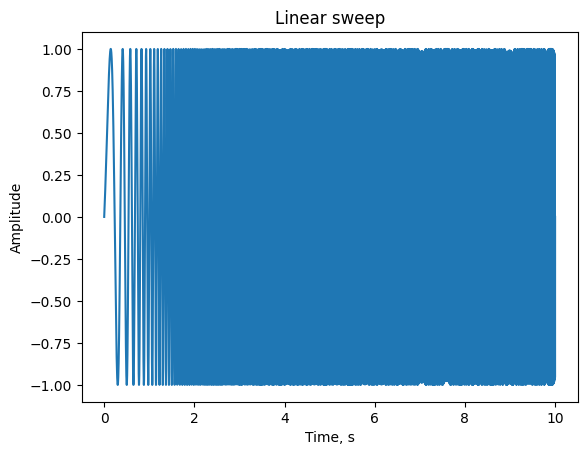

In [24]:
time_sweep = ArrayAxis(0.,10.,0.001)
unsw = UncalculatedSweep(time_sweep, lambda time: 10*time+1, lambda time: np.ones(time.size))
linear_sweep = unsw()

plt.plot(*linear_sweep.get_data())
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Linear sweep')


Show function time frequency:

Text(0.5, 1.0, 'Frequency function')

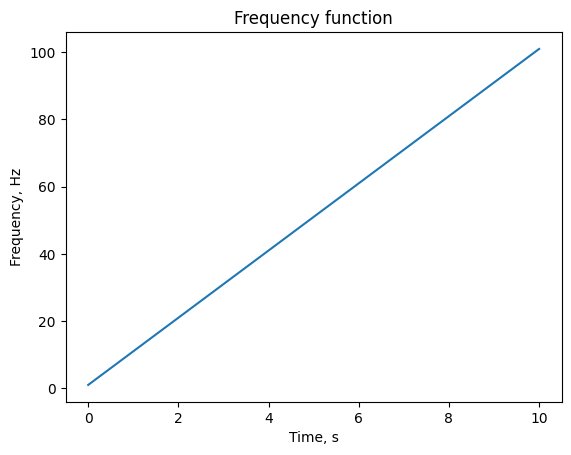

In [25]:
plt.plot(*linear_sweep.frequency_time.get_data())
plt.xlabel('Time, s')
plt.ylabel('Frequency, Hz')
plt.title('Frequency function')


Show function amplitude time:

Text(0.5, 1.0, 'Amplitude function')

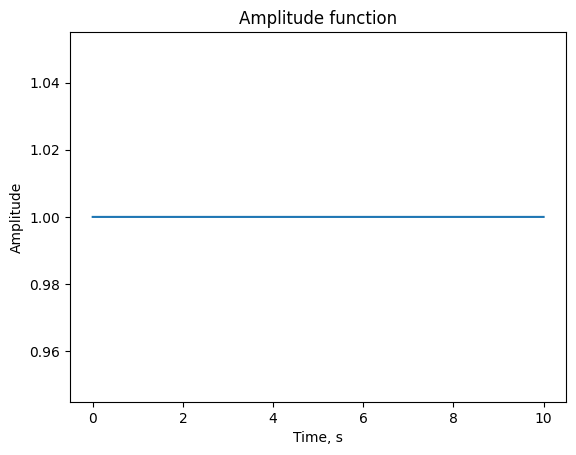

In [26]:
plt.plot(*linear_sweep.amplitude_time.get_data())
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Amplitude function')


Image of Spectrogram:

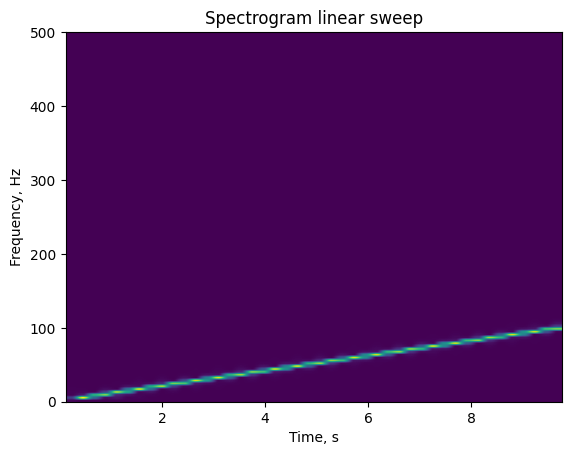

In [46]:
time_spectrogram = linear_sweep.spectrogram.time
frequency_spectrogram = linear_sweep.spectrogram.frequency
extent = [
    time_spectrogram.start, 
    time_spectrogram.end, 
    frequency_spectrogram.start, 
    frequency_spectrogram.end
]
plt.xlabel("Time, s")
plt.ylabel("Frequency, Hz")
plt.title("Spectrogram linear sweep")
plt.imshow(linear_sweep.spectrogram.spectrogram, extent=extent, aspect='auto')

### Next example.

As a change in frequency over time, we take the function:

$$F(t) = sin(2\pi t/2)/2\cdot9+1 $$

where $t$ - time

It is described below as a function **f_t**.

As a change in the amplitude envelope with time, we take the Tukey window 
function, in N samples

$$ w[n] = 
\begin{cases} 
    \frac{1}{2}[1-cos(\frac{2\pi n}{\alpha N})], & 0 \le m < \frac{\alpha N}{2} 
    \\ 1, & \frac{\alpha N}{2} \le t < \frac{N}{2} 
    \\ w[N-n], & 0 \le n \le \frac{N}{2} 
\end{cases}   $$

where $n$ - sample, $N$ - total samples, $\alpha$ - coefficient from 0 to 1

By using the tukey function from the `scipy` library.
Specifying the number of samples as the length of the array along the 
time axis and taking $\alpha$ = 0.3.

It is described below as a function of **a_t**.

Text(0.5, 1.0, 'Linear sweep')

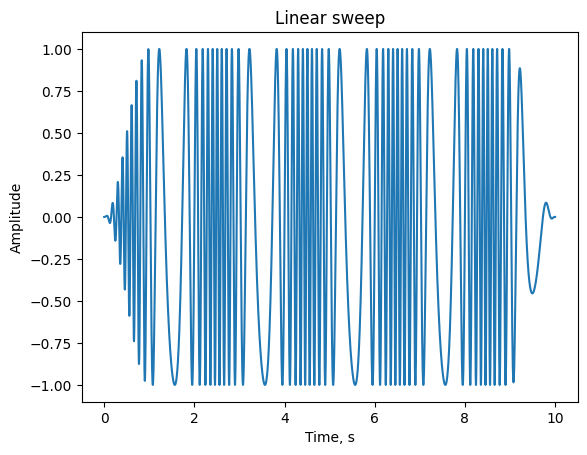

In [28]:
def f_t(time: np.ndarray) -> np.ndarray:
    return (np.sin(time * 2 * np.pi / 2) + 1) / 2 * 9 + 1


usw = UncalculatedSweep(time=time_sweep, frequency_time=f_t, amplitude_time=tukey_a_t(time_sweep.array, 1))
sw = usw()


plt.plot(*sw.get_data())
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Linear sweep')


Text(0.5, 1.0, 'Frequency function')

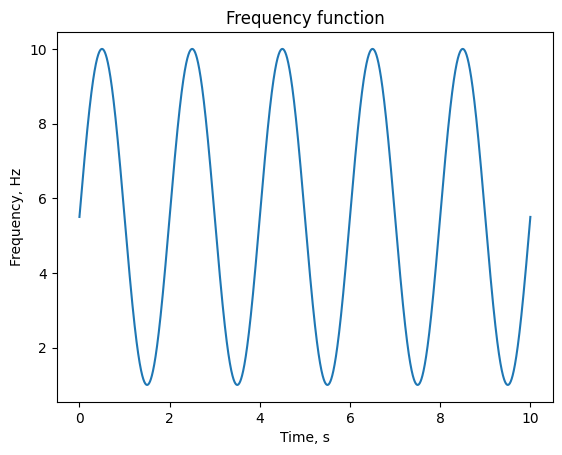

In [34]:
plt.plot(*sw.frequency_time.get_data())
plt.xlabel('Time, s')
plt.ylabel('Frequency, Hz')
plt.title('Frequency function')


Text(0.5, 1.0, 'Amplitude function')

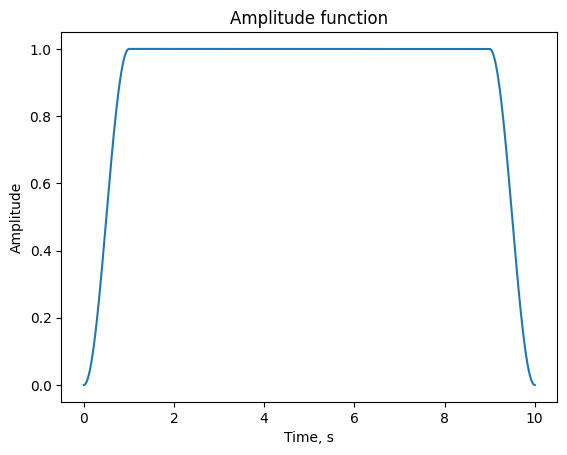

In [35]:
plt.plot(*sw.amplitude_time.get_data())
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Amplitude function')


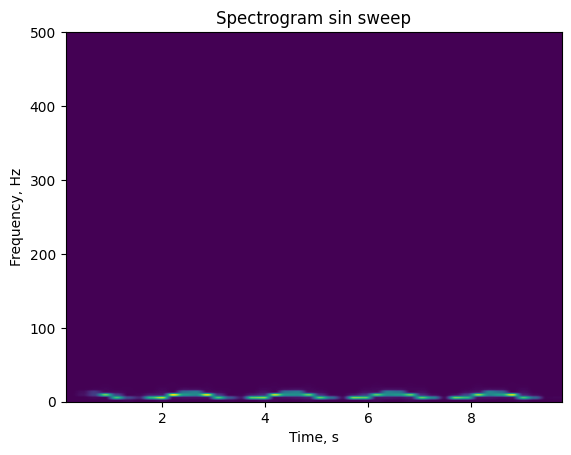

In [48]:
time_spectrogram = sw.spectrogram.time
frequency_spectrogram = sw.spectrogram.frequency
extent = [
    time_spectrogram.start,
    time_spectrogram.end,
    frequency_spectrogram.start,
    frequency_spectrogram.end
]
plt.xlabel("Time, s")
plt.ylabel("Frequency, Hz")
plt.title("Spectrogram sin sweep")
plt.imshow(sw.spectrogram.spectrogram, extent=extent, aspect='auto')


## 8. ApriorUncalculatedSweep

Construction of a sweep signal from a priori data.
  
There is another possibility of building a sweep signal using **a priori data**.
  
To do this, you need to use the `ApriorUncalculatedSweep` class. This class 
inherits from `UncalculatedSweep`.

The difference lies in the arguments it takes to construct an instance 
of the class:

1. The first argument time is responsible for a time.

2. The second argument is responsible for a priori data, it can be an instance 
of a class: `Relation`, `Signal`, `Spectrum` or `Sweep`. 
  
3. The third argument is responsible for the method (function), with the help 
of which functions or sequences of frequency versus time and amplitude versus 
time will be extracted.
  
The extracted functions (amlitude_time, frequency_time) will then be 
passed to the superclass `UncalculatedSweep`.
  
Further calling an instance of the `ApriorUncalculatedSweep` class 
is similar to calling an instance of the `UncalculatedSweep` class, 
which returns an instance of the `Sweep` class.
  
Consider an example of obtaining a sweep signal from a Reeker impulse. 
We will also use the function to receive a signal from the ```scipy``` library.

Text(0.5, 1.0, 'Ricker signal')

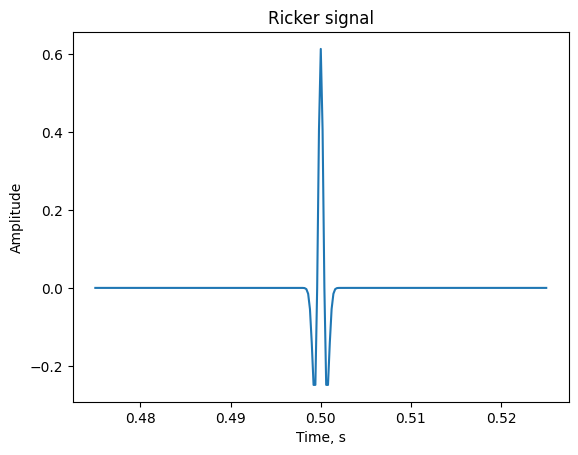

In [29]:
time_ricker = ArrayAxis(0., 1., 0.0002)
amplitude_ricker = ricker(time_ricker.size, a=2)
ricker_signal = Signal(time_ricker, amplitude_ricker)
plt.plot(*ricker_signal[0.475:0.525].get_data())
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Ricker signal')


In [30]:
time_sweep_2 = ArrayAxis(0.,10., 0.0002)
usw2 = ApriorUncalculatedSweep(time=time_sweep_2, a_prior_data=ricker_signal)
sw2 = usw2()


The `ftat_method` parameter is optional. The default function 
is ```simple_freq2time``` from Config class ```sweep_design.config```
```python
def simple_freq2time(spectrum: 'Spectrum') -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    f, A = spectrum.get_amp_spectrum().get_data()
    n_spec = A ** 2
    nT = np.append([0.], ((n_spec[1:]+n_spec[:-1])/(f[1:]-f[:-1])).cumsum())
    coef = integrate.trapz(n_spec, f)
    a_t = sqrt(coef*2)*np.ones(len(nT))
    return nT, f, a_t
``` 

Text(0.5, 1.0, 'Sweep-signal')

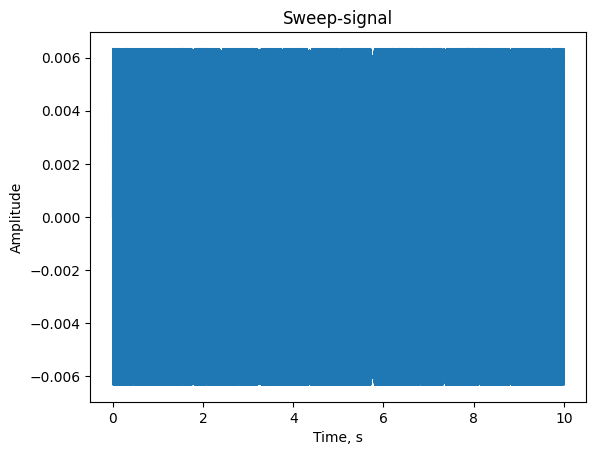

In [31]:

plt.plot(*sw2.get_data())
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Sweep-signal')


Text(0.5, 1.0, 'A prior signal')

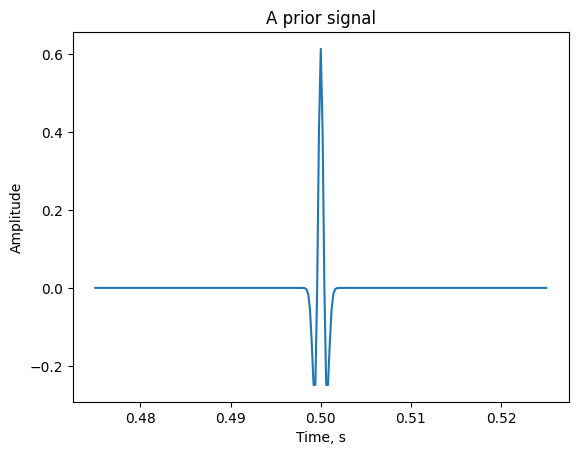

In [44]:
aprior_signal = sw2.a_prior_signal
plt.plot(*aprior_signal[.475:.525].get_data())
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('A prior signal')


The result is a non-linear sweep signal whose amplitude spectrum is similar 
to the amplitude spectrum of the transmitted spectrum of the Reeker signal.
  
You can verify this by using the execution of sequences of functions:

1. On instances of the `Sweep` and `Signal` classes, which are 
**sw2** and **aprior_signal**, you can call the `get_amplitude_spectrum()` 
method, which returns an instance of the class `Relation` describing 
the amplitude spectrum of the signals.

2. And finally, as in the previous examples, retrieve the data using the 
`get_data()` method and pass the result to the `plt.plot()` method     

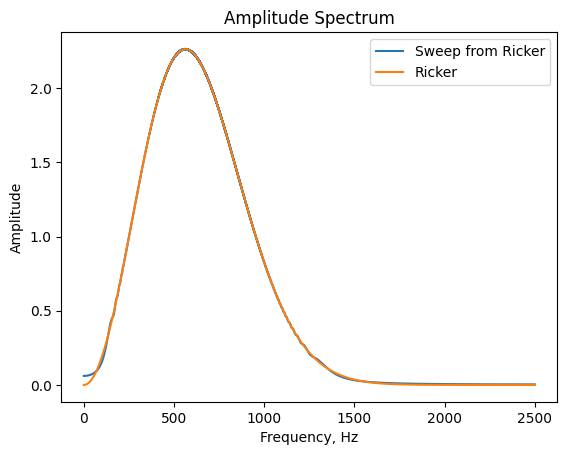

In [41]:
norm_sweep = sw2.get_norm()
freq_f_t2, amp_f_t2 = sw2.get_amplitude_spectrum().get_data()
plt.plot(freq_f_t2, amp_f_t2, label="Sweep from Ricker")
freq_f_t3, amp_f_t3 = ricker_signal.get_amplitude_spectrum().get_data()
plt.plot(freq_f_t3, amp_f_t3, label="Ricker")
plt.xlabel('Frequency, Hz')
plt.ylabel('Amplitude')
plt.title('Amplitude Spectrum')
plt.legend()


## 9. Config

If you don't like default methods that calculated new parameters, you can 
override the methods in the `Config` and the `ConfigSweep` classes, which
are located in the `sweep_design.config` module. See **API References.** for 
more information.

Next section you can find examples of prepared sweep.

## 10. Utility functions and prepared sweeps

Module `sweep-design.utility_functions` contains functions:
- `tukey_a_t` - for amplitude modulation.
- `get_IMFs_ceedman` and `get_IMFs_emd` - empirical mode decomposition.
- `f_t_linear_array` and `f_t_linear_function` - linear frequency modulation.
- `proportional_freq2time` and `dwell` - extractor frequency modulation and amplitude modulation from `Spectrum`.
- `correct_sweep` - correction sweep for displacement.
- `get_correction_for_source` - correction sweep for displacement using limitation of source.

Module `sweep-design.prepared_sweep` contains functions to create sweep:

- `get_dwell_sweep` - extract dwell sweep signal from a prior `Spectrum`.
- `get_linear_sweep` - get_linear_sweep from a prior `Spectrum`
- `get_shuffle` - get shuffle sweep.
- `get_code_sweep_segments` -  get sweep by composing sweep signal in sequence of set code.
- `get_convolution_sweep_and_code` - get sweep by correlate sweep and code.
- `get_m_sequence_code`, `get_relation_m_sequence` - m-sequence code.
- `get_code_zinger`, `get_code_zinger_relation` - extract zinger code.


